## Basic File I/O

We use files to:
* use existing data
* store things we calculated that we want to use later
* store large amounts of information (too big to fit into RAM)

Virtually all programs that you’ve used wrote and read files from disk at some point:
* Word processing (documents)
* Web browser (cookies)
* Games (saved progress)
* Music player (songs)
* SQL Client (database)

Similar to a variable, a file is a series of bits (ones and zeros):
* in plain text, bits encode characters
* in JPEGs, bits encode information about the color of the image pixels
* in MP3 files, bits encode frequency information

Python has built-in functionality to work with files. The first step is to **open** the file

In [ ]:
#IGNORE THIS FOR NOW
tmp="""first line!
09317 another line with some numbers 3121787 6.9

a line after an empty line"""

with open('basic.txt','w') as file:
    file.write(tmp)

In [ ]:
# File Path:
file_path = 'basic.txt' 
# The path to the file on the disk, a string
# Can be relative or absolute

# Access Mode:
access_mode = 'r' 
# Whether we want to read, overwrite or append to a file (see below for details), a string

# Open:
file = open(file_path, access_mode)
# This creates a file object (another data type!) with the “name tag” file
# It does not load the file into memory!

# Once you are done, you need to close the file. So let's do it now
file.close()

**Detour File Paths**

Windows:
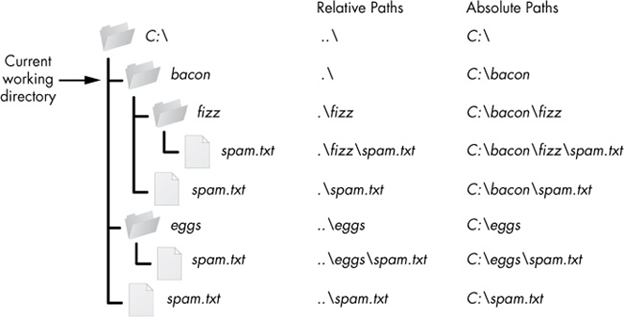

Linux (Mac is similar):
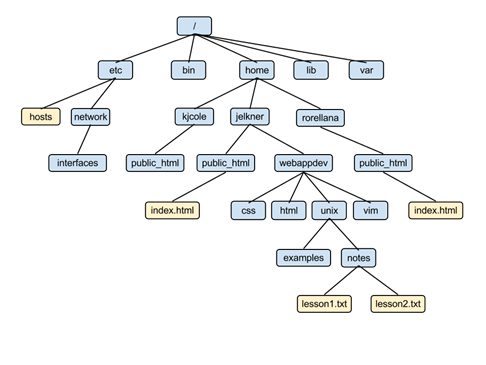

In [ ]:
# Relative to what?
import os
print(os.getcwd())

The two main things we do is reading from the files and writing to files. The following is some versions of doing this:
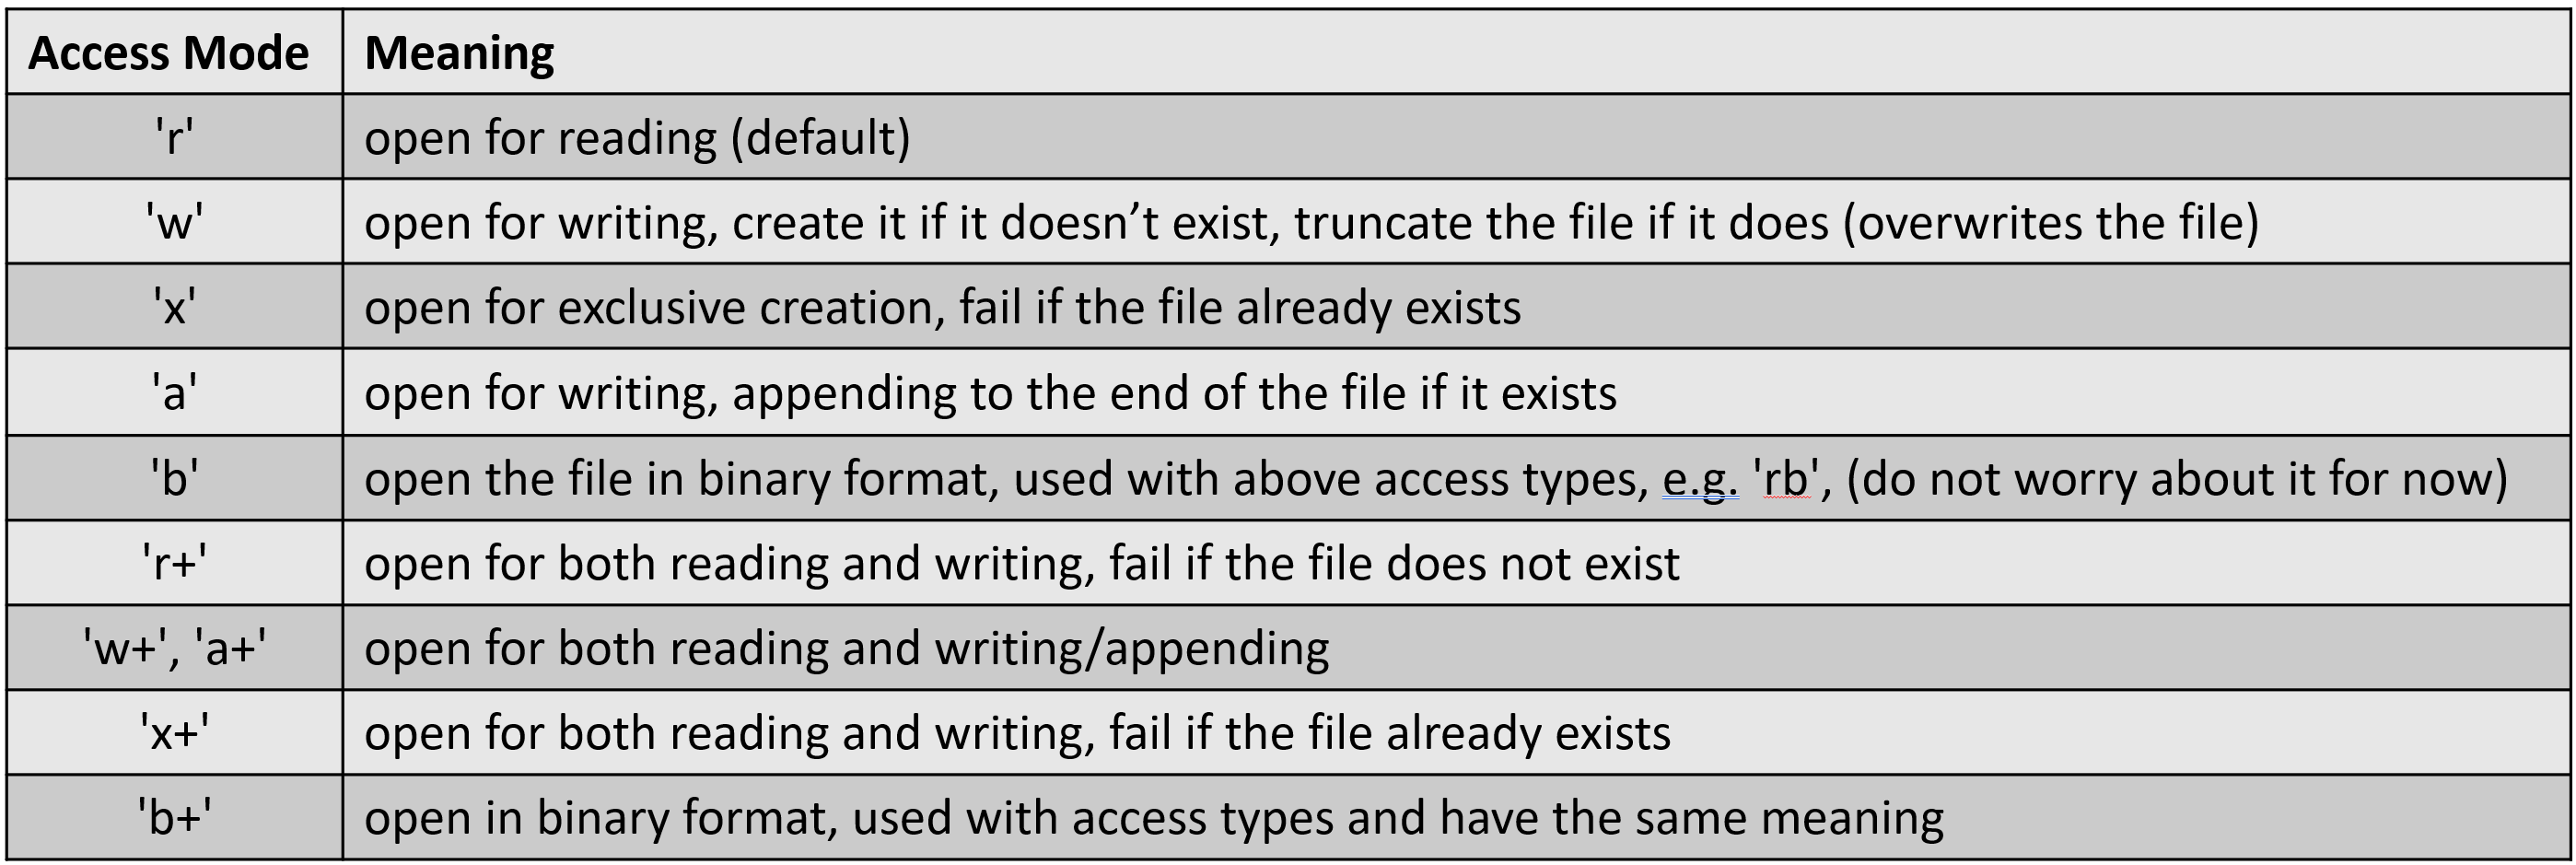

There are multiple ways to read a file in Python. Common ones:
* Read the entire file (copy the entire file into memory): `file.read()` 
* Read the file line-by-line (makes more sense with text-based files): `file.readline()` or foreach the file
* Read the file certain number of bytes at a time (e.g. 1 character at a time): `file.read(size_in_bytes)`

For this course, we are going to concentrate on line-by-line method to keep things simple. Moreover, numpy and pandas have their own utility functions to read specific file types (e.g. csv, xlx ...)

In [ ]:
file = open(file_path, 'r')

i = 0
while True:
    i += 1
    line = file.readline()
    if line:
        print(f'Line {i}: {line}')
    else:
        print('Reached end of the file')
        break
        
# readline returns the line, including the newline character, if there is a line to be read and returns None otherwise.

# Do not forget this! 
file.close()

In [ ]:
file = open(file_path, 'r')

# For-Eaching the file
i = 0
for line in file:
    i += 1
    print(f'Line {i}: {line}')
        
print('Reached end of the file')        

# this also returns the lines of the file, including the newline character

file.close()

Use `rstrip()` to get rid of all the trailing white spaces or strip the white spaces from the right side of the string (yes there is also `lstrip()`)

In [ ]:
file = open(file_path, 'r')

#Handling the trailing white spaces
i = 0
for line in file:
    i += 1
    print(f'Line {i}: {line.rstrip()}')
        
print('Reached end of the file')        

# this also returns the lines of the file, including the newline character

file.close()

**Question:** What if there is no such file with the `'r'` access mode?

In [ ]:
try:
    file = open('none.txt','r')
    #Do stuff with the file
except FileNotFoundError as e:
    print('File not found')
finally:
    file.close()

Opening and closing is cumbersome, there is syntactic candy to help with this called the `with`  statement. We are not going to go into detail for time concerns but [recommended reading](https://realpython.com/python-with-statement/) if you want to learn more:

In [ ]:
with open(file_path, 'r') as file:
    i = 0
    for line in file:
        i += 1
        print(f'Line {i}: {line.rstrip()}')

In [ ]:
try:
    with open('none.txt', 'r') as file:
        i = 0
        for line in file:
            i += 1
            print(f'Line {i}: {line.rstrip()}')
except FileNotFoundError as e:
    print('File not found')

In [ ]:
s= """10, 11, 20, 10.4, hello 
-10, 22.3, 6, -1, world"""

file = open('tmp.txt','w')
file.write(s)

In [ ]:
# either float or string, we have 5 columns, each column has the same type
#  each column to a separate list
delimiter= ','
first = True
types = []

allCols = []

for i in range(5):
    allCols.append([])
with open('tmp.txt', 'r') as file:
    for line in file:
        items = line.rstrip().split(delimiter)
        for i,item in enumerate(items):
            item = item.lstrip()
            try:
                tmp = float(item)
            except:
                tmp = item
            allCols[i].append(tmp) 
print(allCols)

There are multiple ways to write to a file in Python. Common ones:
* Write a string directly: `file.write(text)`
* Write a collection/sequence of strings each to a line: `file.writelines(lines)`

For this course, we are going to concentrate on writing strings directly to keep things simple. Moreover, numpy and pandas have their own utility functions to write specific file types (e.g. csv, xlx ...)

In [ ]:
file_path_write = 'output.txt'

with open(file_path_write, 'w') as file:
    s = 'Hello World!'
    file.write(s)

In [ ]:
with open(file_path_write,'r') as file:
    print(file.read())

In [ ]:
with open(file_path_write, 'w') as file:
    s = 'Overwriting Hello World!'
    file.write(s)
    file.write('\n')
    
with open(file_path_write,'r') as file:
    print(file.read())

In [ ]:
with open(file_path_write, 'a') as file:
    s = 'Appending'
    file.write(s)
    
with open(file_path_write,'r') as file:
    print(file.read())

In [ ]:
with open('allCols.txt', 'w') as file:
    for col in allCols:
        for i in range(len(col)-1):
            file.write(str(col[i]) + ', ')
        file.write(str(col[-1]) + '\n')
with open('allCols.txt','r') as file:
    print(file.read())

In [ ]:
rows = 2
with open('allCols2.txt', 'w') as file:
    for i in range(rows):
        for j,col in enumerate(allCols):
            if j == len(allCols)-1:
                file.write(str(col[i]) +'\n')
            else:
                file.write(str(col[i]) + ', ')
        
with open('allCols2.txt','r') as file:
    print(file.read())

**String Formatting:**

Imagine you are writing a csv file with multiple columns line by line. Each column may have a different data type (string, integer, float - decimal, float - scientific etc.). How do we create these strings to write?

Remember string formatting from the string notebook. We will skip details in the interest of time. Look at the uploaded pdf. Also a [good tutorial](https://realpython.com/python-string-formatting/). I recommend learning about f-Strings!

**Other Stuff**

When you open a file “the file pointer” points to the files beginning. You can manually move this pointer around just like you would a cursor. This allows you to be more flexible in processing a file, e.g., processing a file backwards (from its end to its start).

Hint for the interested: `tell` and `seek` methods of the file class